In [30]:
import matplotlib.pyplot as plt

In [31]:
users = [
    { "id": 0, "name": "Hero" },
    { "id": 1, "name": "Dunn" },
    { "id": 2, "name": "Sue" },
    { "id": 3, "name": "Chi" },
    { "id": 4, "name": "Thor" },
    { "id": 5, "name": "Clive" },
    { "id": 6, "name": "Hicks" },
    { "id": 7, "name": "Devin" },
    { "id": 8, "name": "Kate" },
    { "id": 9, "name": "Klein" }
]

In [32]:
friendship_pairs = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
(4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

In [33]:
# Initialize the dict with an empty list for each user id:
friendships = {user["id"]: [] for user in users}
# And loop over the friendship pairs to populate it:
for i, j in friendship_pairs:
    friendships[i].append(j) # Add j as a friend of user i
    friendships[j].append(i) # Add i as a friend of user j

In [34]:
friendships

{0: [1, 2],
 1: [0, 2, 3],
 2: [0, 1, 3],
 3: [1, 2, 4],
 4: [3, 5],
 5: [4, 6, 7],
 6: [5, 8],
 7: [5, 8],
 8: [6, 7, 9],
 9: [8]}

In [35]:
def number_of_friends(user):
    """How many friends does _user_ have?"""
    user_id = user["id"]
    friend_ids = friendships[user_id]
    return len(friend_ids)

total_connections = sum(number_of_friends(user) for user in users) # 24

In [36]:
print(total_connections)

24


In [37]:
num_users = len(users) # length of the users list
avg_connections = total_connections / num_users # 24 / 10 == 2.4

In [38]:
print(num_users)
print(avg_connections)

10
2.4


In [39]:
# Create a list (user_id, number_of_friends).
num_friends_by_id = [(user["id"], number_of_friends(user)) 
                        for user in users]
num_friends_by_id.sort(                             # Sort the list
    key=lambda id_and_friends: id_and_friends[1],   # by num_friends
    reverse=True)                                   # largest to smallest


num_friends_by_id

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

In [40]:
from collections import Counter
def friends_of_friends(user):
    user_id = user["id"]
    return Counter(
    foaf_id
    for friend_id in friendships[user_id]   # For each of my friends,
    for foaf_id in friendships[friend_id]   # find their friends
    if foaf_id != user_id                   # who aren't me
    and foaf_id not in friendships[user_id] # and aren't my friends.
    )

In [41]:
print(friends_of_friends(users[3]))         # Counter({0: 2, 5: 1})

"""This correctly tells Chi (id 3) that she has two mutual friends with Hero (id
0) but only one mutual friend with Clive (id 5)."""

Counter({0: 2, 5: 1})


'This correctly tells Chi (id 3) that she has two mutual friends with Hero (id\n0) but only one mutual friend with Clive (id 5).'

In [42]:
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [43]:
from collections import defaultdict
# Keys are interests, values are lists of user_ids with that interest

user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)

# Keys are user_ids, values are lists of interests for that user_id.
interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

print(user_ids_by_interest)
print(interests_by_user_id)

defaultdict(<class 'list'>, {'Hadoop': [0, 9], 'Big Data': [0, 8, 9], 'HBase': [0, 1], 'Java': [0, 5, 9], 'Spark': [0], 'Storm': [0], 'Cassandra': [0, 1], 'NoSQL': [1], 'MongoDB': [1], 'Postgres': [1], 'Python': [2, 3, 5], 'scikit-learn': [2, 7], 'scipy': [2], 'numpy': [2], 'statsmodels': [2], 'pandas': [2], 'R': [3, 5], 'statistics': [3, 6], 'regression': [3, 4], 'probability': [3, 6], 'machine learning': [4, 7], 'decision trees': [4], 'libsvm': [4], 'C++': [5], 'Haskell': [5], 'programming languages': [5], 'mathematics': [6], 'theory': [6], 'Mahout': [7], 'neural networks': [7, 8], 'deep learning': [8], 'artificial intelligence': [8], 'MapReduce': [9]})
defaultdict(<class 'list'>, {0: ['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra'], 1: ['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres'], 2: ['Python', 'scikit-learn', 'scipy', 'numpy', 'statsmodels', 'pandas'], 3: ['R', 'Python', 'statistics', 'regression', 'probability'], 4: ['machine learning', 'regression'

In [44]:
def most_common_interests_with(user):
    return Counter(
        interested_user_id
        for interest in interests_by_user_id[user["id"]]
        for interested_user_id in user_ids_by_interest[interest]
        if interested_user_id != user["id"]
    )

print(most_common_interests_with(users[3]))

Counter({5: 2, 6: 2, 2: 1, 4: 1})


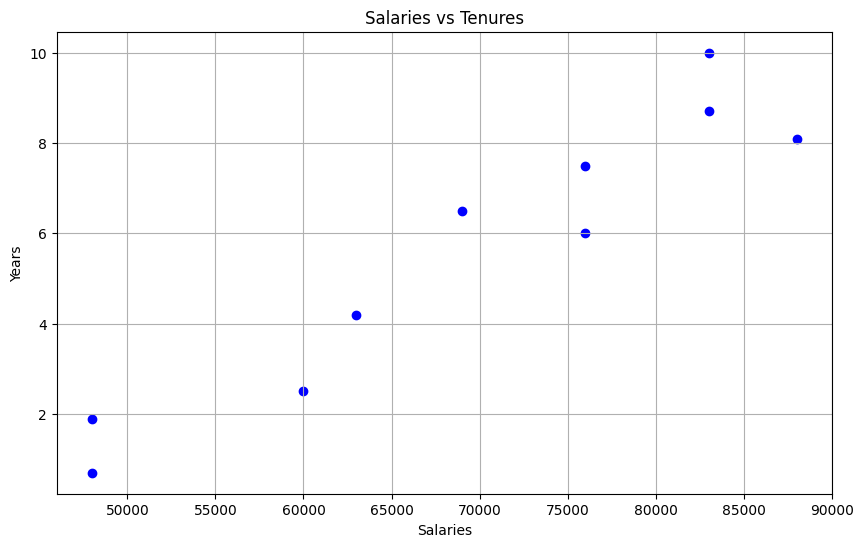

In [45]:
salaries_and_tenures = [
    (83000, 8.7), (88000, 8.1),
    (48000, 0.7), (76000, 6),
    (69000, 6.5), (76000, 7.5),
    (60000, 2.5), (83000, 10),
    (48000, 1.9), (63000, 4.2)
]

# Separate salaries and tenures
salaries = [salary for salary, _ in salaries_and_tenures]
tenures = [tenure for _, tenure in salaries_and_tenures]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(salaries, tenures, color='blue')
plt.title('Salaries vs Tenures')
plt.xlabel('Salaries')
plt.ylabel('Years')
plt.grid(True)
plt.show()

In [46]:
def tenure_bucket(tenure):
    if tenure < 2:
        return "less than two"
    elif tenure < 5:
        return "between two and five"
    else:
        return "more than five"

In [47]:
salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure_bucket[tenure_bucket(tenure)].append(salary)

In [48]:
average_salary_by_bucket = {
    tenure_bucket: sum(salaries) / len(salaries) for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

average_salary_by_bucket

{'more than five': 79166.66666666667,
 'less than two': 48000.0,
 'between two and five': 61500.0}

In [ ]:
def predict_paid_or_unpaid(years_experience):
    if years_experience < 3.0:
        return "paid"
    elif years_experience < 8.5:
        return "unpaid"
    else:
        return "paid"